Matrix Factorization with Gradient Descent

\begin{eqnarray}
E(W, H) = \frac{1}{2} \sum_i \sum_j M(i,j)(X(i,j) - \sum_k W(i,k)H(k,j))^2
\end{eqnarray}

\begin{eqnarray}
\frac{\partial E(W, H)}{\partial W_{i,k}} = -\sum_j M(i,j)(X(i,j) - \sum_{k'} W(i,k')H(k',j)) H(k,j)
\end{eqnarray}

\begin{eqnarray}
\frac{\partial E(W, H)}{\partial H_{k,j}} = -\sum_i M(i,j)(X(i,j) - \sum_{k'} W(i,k')H(k',j)) W(i,k)
\end{eqnarray}



$X$ : Observed Matrix

$M$ : Mask Matrix (1 if observed, 0 otherwise)

\begin{eqnarray}
E(W, H) = \frac{1}{2} \trace (X - WH)^\top (X - WH) 
\end{eqnarray}

With missing values
\begin{eqnarray}
E(W, H) = \frac{1}{2} \trace (M\odot (X - WH))^\top (M\odot (X - WH) )
\end{eqnarray}

Partial derivatives
\begin{eqnarray}
\frac{\partial E(W, H)}{\partial W} = -(M\odot(X - WH))H^\top 
\end{eqnarray}

\begin{eqnarray}
\frac{\partial E(W, H)}{\partial H} = -W^\top(M\odot(X - WH))
\end{eqnarray}


1019.36567954
0.0751311299154
0.0129468736437
0.00952989058923
0.00920142020201
0.00916793720565
0.00916448806125
0.00916413167128
0.00916409481064
0.00916409099703


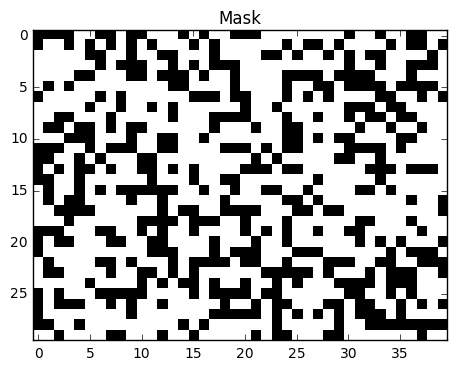

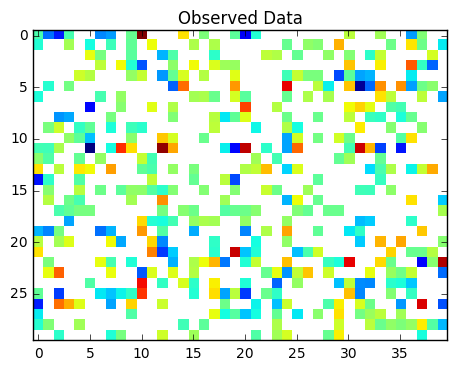

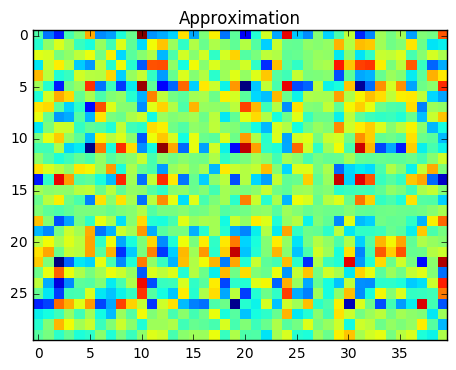

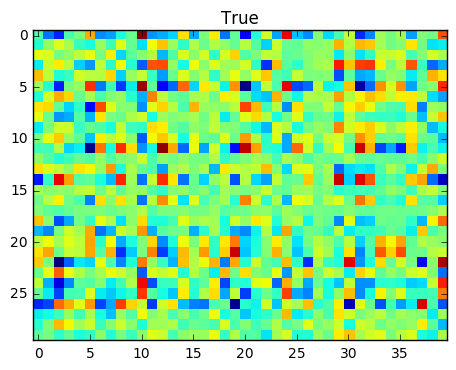

In [30]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

M = 30
N = 40
K = 4 

W_true = np.random.randn(M,K)
H_true = np.random.randn(K,N)

X = W_true.dot(H_true)
X = X+0.01*np.random.randn(M,N)

Mask = (np.random.rand(M,N)<0.4)



W = np.random.randn(M,K)
H = np.random.randn(K,N)

EPOCH = 1000

eta = 0.05

for i in range(EPOCH):
    dW = -(Mask*(X-W.dot(H))).dot(H.T)
    W = W - eta*dW
    dH = -W.T.dot((Mask*(X-W.dot(H))))
    H = H - eta*dH

    if (i%100 == 0):
        print(0.5*np.sum((Mask*(X-W.dot(H)))**2))


plt.imshow(Mask, interpolation='nearest',cmap=plt.cm.gray_r)
plt.title('Mask')
plt.show()

MX = X.copy()
MX[Mask==0] = np.nan

plt.imshow(MX, interpolation='nearest')
plt.title('Observed Data')
plt.show()
plt.imshow(W.dot(H), interpolation='nearest')
plt.title('Approximation')
plt.show()
plt.imshow(X, interpolation='nearest')
plt.title('True')
plt.show()

